## (SA) MD1 cmax -> GPP (fixed bounds)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
from pandas.plotting import scatter_matrix
%matplotlib inline

In [35]:
ls MD1/SA-MD1-STEP1

info.txt           param_props.csv    results.txt        sample_matrix.csv


In [7]:
cat MD1/SA-MD1-STEP1/param_props.csv

name,bounds,initial,cmtnum,pftnum
cmax,"[0.1, 500]",381.191147,1,0
cmax,"[0.1, 200]",113.931764,1,1
cmax,"[0.1, 300]",210.48654,1,2
cmax,"[0.1, 200]",93.312621,1,3


In [2]:
path='MD1/SA-MD1-STEP1/'
params='sample_matrix.csv'
model='results.txt'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params)
param_name = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_name
model_name = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_name

In [3]:
df_model

,GPP0,GPP1,GPP2,GPP3
0,247.941825,43.630780,63.702678,62.791961
1,139.592580,10.593281,13.564094,83.261826
2,368.682895,32.804915,10.911346,95.112943
3,477.904659,13.882124,23.064703,26.608003
4,204.237388,25.607911,41.812459,36.036832
...,...,...,...,...
996,458.124507,42.465655,16.577726,50.039683
997,217.462858,42.861522,15.857806,29.088301
998,420.317838,6.512898,45.369789,48.680002
999,226.848546,21.634226,49.222719,24.742752


In [4]:
df_param

,cmax0,cmax1,cmax2,cmax3
0,304.672433,196.092846,288.617103,108.042352
1,171.394909,51.222722,61.658618,147.982790
2,442.861783,151.861485,49.029722,163.470253
3,583.949853,61.493824,103.332041,46.044853
4,261.797349,118.444634,187.567088,62.143091
...,...,...,...,...
995,583.901609,169.648736,117.642968,52.416173
996,574.717508,192.389446,74.212813,85.856366
997,282.053563,181.504867,70.226700,50.183668
998,535.173059,32.136751,207.972617,84.669190


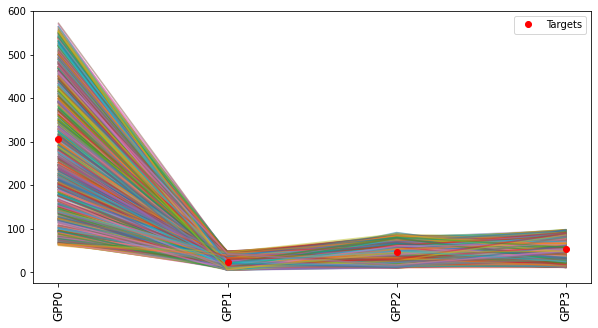

In [3]:
ut.spaghetti_match_plot(df_param,df_model)

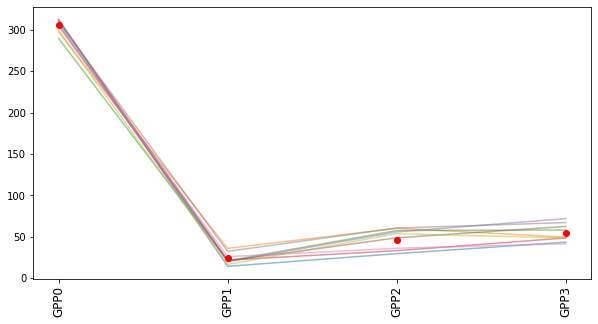

In [12]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.99)

In [14]:
def z_score(y_short,y_long,outnames):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    outnames : dataframe header
    '''

    zscore=[]
    for iname in outnames:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
        print (y_short[iname].mean()-y_long[iname].iloc[-1],y_short[iname].std())
    
    return zscore
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param,df_model,r2lim=0.99)
output_name_MD1 = ['GPP0','GPP1','GPP2','GPP3']
z_score(ymodel_MD1,df_model,output_name_MD1)

-0.6623106074333123 8.168312957608965
-3.1018386257782176 8.625080338393403
1.4820312494039598 11.555478073958438
-0.5101422882080016 10.503259978039674


[-0.08108291282061558,
 -0.35963011404900125,
 0.12825356423321704,
 -0.048569900133350254]

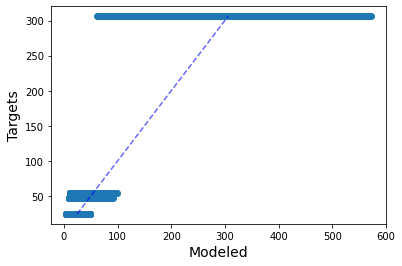

In [19]:
ut.one_to_one_match_plot(df_model)

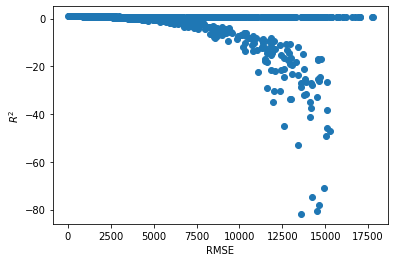

In [15]:
ut.plot_r2_rmse(df_model);

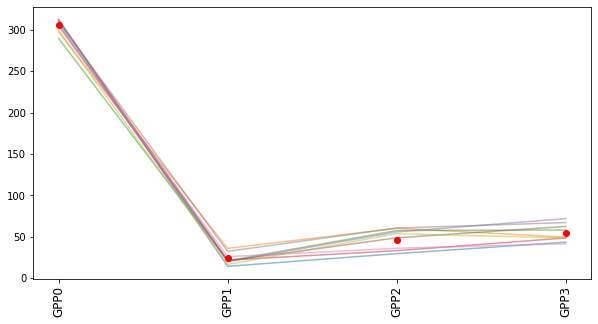

In [26]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.99)

In [23]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.98)
xparams.head()

,cmax0,cmax1,cmax2,cmax3,$R^2$,RMSE,MAPE
43,388.566774,64.074454,259.377609,44.695466,0.981959,272.676511,0.499769
80,411.214777,153.050631,264.437566,60.456709,0.987079,181.818524,0.272723
85,376.077620,109.095911,100.427968,83.436659,0.987881,164.359168,0.313811
138,412.849431,125.040197,337.335362,78.902594,0.980585,274.586894,0.174371
158,388.313287,119.785758,78.190533,85.461277,0.985098,219.773269,0.452041


In [25]:
ymodel.head()

,GPP0,GPP1,GPP2,GPP3
43,314.215707,14.553277,57.481525,25.859547
80,316.043214,35.533063,58.286003,35.032654
85,299.342107,23.471330,22.491101,48.469561
138,320.944337,26.883860,74.805304,45.740702
158,310.163148,25.881175,17.553329,49.662060


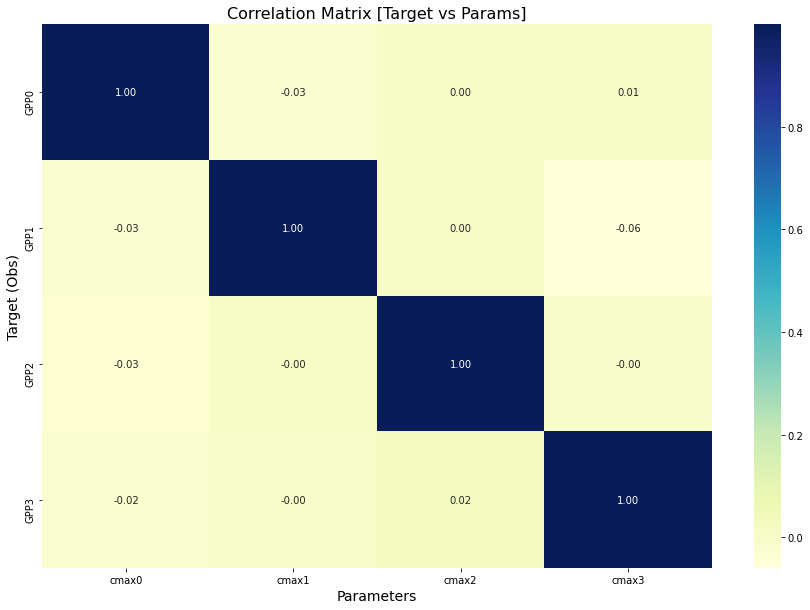

In [20]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

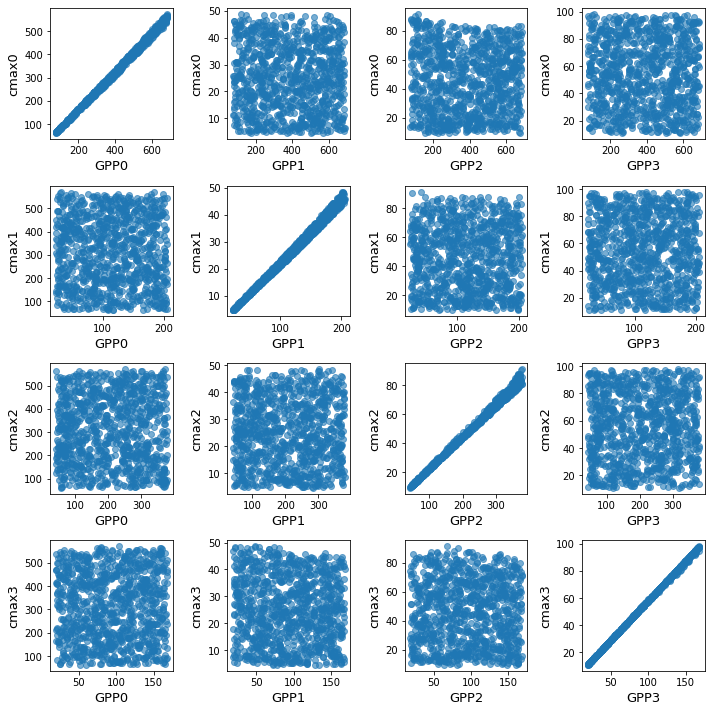

In [21]:
[n,m]=df_param.shape
fig, axs = plt.subplots(nrows=m, ncols=4, figsize=(10,10))
for i in range(m):
    for j in range(4):
        axs[i,j].scatter(df_param.iloc[0:n,i], df_model.iloc[0:n,j],alpha=0.6)
        axs[i,j].set_xlabel(df_model.columns[j],FontSize=13)
        axs[i,j].set_ylabel(df_param.columns[i],FontSize=13)
fig.tight_layout() 

## (CA) MD1 cmax -> GPP (fixed bounds)

(29, 4) (30, 4)


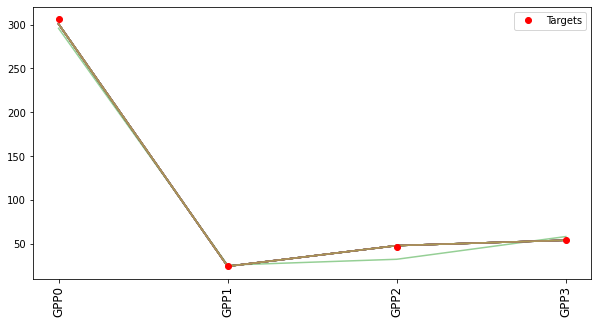

In [44]:
path='MD1/calib-step1-md1/' #10% variance
params='param_step1-md1.csv'
model='out_step1-md1.csv'
df_param = pd.read_csv(path+params)
df_model = pd.read_csv(path+model)

param_name = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_name


model_name = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_name
print(df_param.shape,df_model.shape)
ut.spaghetti_match_plot(df_param,df_model)

## (SA) MD1 nmax, krb -> NPP, VEGC (fixed bounds)

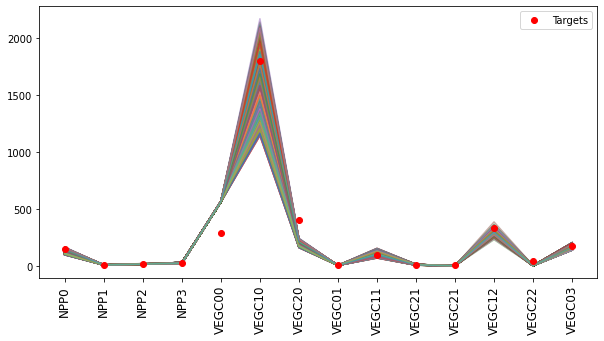

In [46]:
def get_sa_data_step2(path):
    params='sample_matrix.csv'
    model='results.csv'
    df_model = pd.read_csv(path+model,header=None)
    output_name = ['NPP0','NPP1','NPP2','NPP3','VEGC00','VEGC10','VEGC20','VEGC01','VEGC11','VEGC21','VEGC21',\
                   'VEGC12','VEGC22','VEGC03']
    df_model.columns = output_name

    df_param= pd.read_csv(path+params)
    output_name = ['nmax0','nmax1','nmax2','nmax3','krb00','krb10','krb20','krb01','krb11','krb21','krb21',\
                   'krb12','krb22','krb03']
    df_param.columns = output_name
    return df_param,df_model

[df_param,df_model]=get_sa_data_step2('MD1/SA-MD1-STEP2/')
ut.spaghetti_match_plot(df_param,df_model)

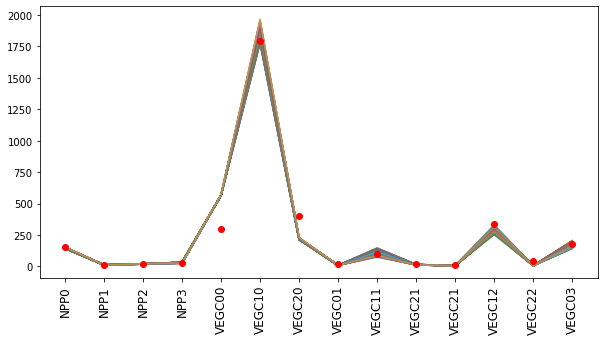

In [50]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.96)

## (CA) MD1 nmax, krb -> NPP, VEGC (fixed bounds)

(69, 14) (70, 14)


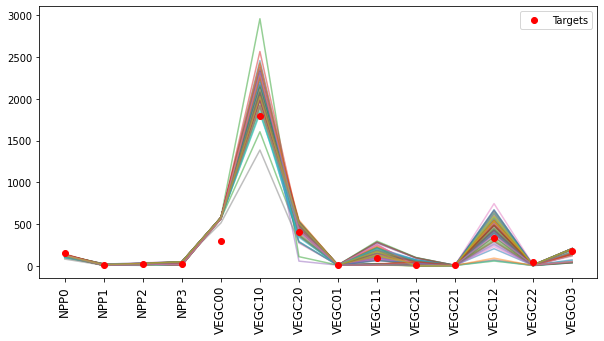

In [16]:
path='MD1/calib-step2-md1/' #10% variance
params='param_step2-md1.csv'
model='out_step2-md1.csv'
df_param = pd.read_csv(path+params)
df_model = pd.read_csv(path+model)

param_name = ['nmax0','nmax1','nmax2','nmax3','krb00','krb10','krb20','krb01','krb11','krb21','krb21',\
                   'krb12','krb22','krb03']
df_param.columns = param_name

model_name = ['NPP0','NPP1','NPP2','NPP3','VEGC00','VEGC10','VEGC20','VEGC01','VEGC11','VEGC21','VEGC21',\
                   'VEGC12','VEGC22','VEGC03']
              #'VEGC00','VEGC10','VEGC20','VEGC01','VEGC11','VEGC21','VEGC02',\
              #     'VEGC12','VEGC22','VEGC03']
df_model.columns = model_name
print(df_param.shape,df_model.shape)
ut.spaghetti_match_plot(df_param,df_model)

## SA: (nfall) NPP,VEGC, VEGN (+-0.75)

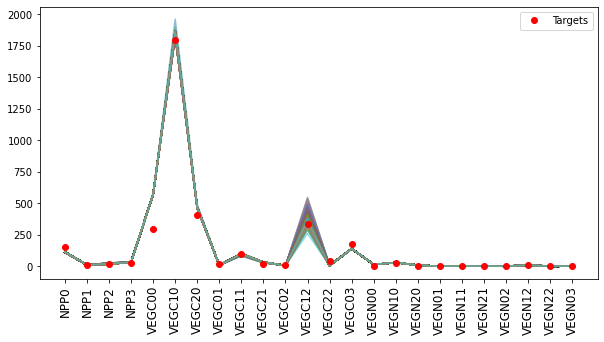

In [6]:
def get_sa_data_nfall_VEGN(path):
    params='sample_matrix.csv'
    model='results.csv'
    df_model = pd.read_csv(path+model,header=None)
    output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC10','VEGC20','VEGC01','VEGC11','VEGC21','VEGC02',\
              'VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20','VEGN01','VEGN11','VEGN21','VEGN02',\
              'VEGN12','VEGN22','VEGN03']
    df_model.columns = output_name

    df_param= pd.read_csv(path+params)
    output_name = ['nfall00','nfall10','nfall20','nfall01','nfall11','nfall21','nfall02',\
               'nfall12','nfall22','nfall03']
    df_param.columns = output_name
    return df_param,df_model

[df_param,df_model]=get_sa_data_nfall_VEGN('MD1/SA-STEP3-MD1-NPPVEGCVEGN-nfall-075/')
ut.spaghetti_match_plot(df_param,df_model)

## CA: (nfall) NPP,VEGC, VEGN (+-0.75)

(20, 10) (21, 24)


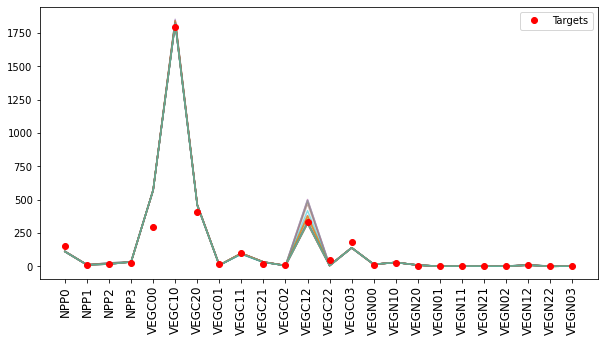

In [9]:
# new results from the scripts folder
path='MD1/calib-step3-md1/'
params='param_step3-md1.csv'
model='out_step3-md1.csv'

df_model = pd.read_csv(path+model,header=None)
output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC10','VEGC20','VEGC01','VEGC11','VEGC21','VEGC02',\
              'VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20','VEGN01','VEGN11','VEGN21','VEGN02',\
              'VEGN12','VEGN22','VEGN03']
df_model.columns = output_name
df_param= pd.read_csv(path+params,header=None)
output_name = ['nfall00','nfall10','nfall20','nfall01','nfall11','nfall21','nfall02',\
               'nfall12','nfall22','nfall03']
df_param.columns = output_name
print(df_param.shape,df_model.shape)
ut.spaghetti_match_plot(df_param,df_model)

## CA STEP4 SoilC (bound) kdcsomcr-kdcsompr-fixed

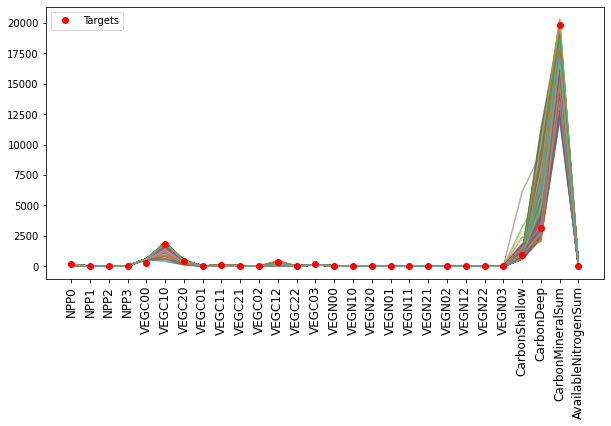

In [12]:
def get_sa_data_soilc_all(path):
    params='sample_matrix.csv'
    model='results.csv'
    df_model = pd.read_csv(path+model,header=None)
    output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC10','VEGC20','VEGC01','VEGC11','VEGC21','VEGC02',\
              'VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20','VEGN01','VEGN11','VEGN21','VEGN02',\
              'VEGN12','VEGN22','VEGN03', 'CarbonShallow', 'CarbonDeep', \
                  'CarbonMineralSum', 'AvailableNitrogenSum']
    df_model.columns = output_name

    df_param = pd.read_csv(path+params)
    return df_param,df_model

[df_param,df_model]=get_sa_data_soilc_all('MD1/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/')
ut.spaghetti_match_plot(df_param,df_model)

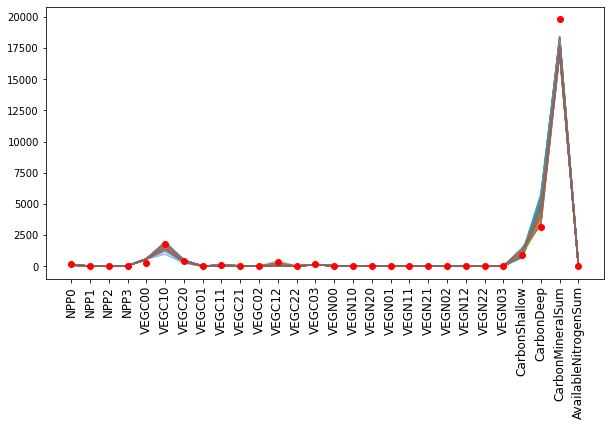

In [18]:
ut.spaghetti_match_plot_r2(df_param,df_model,r2lim=0.97)

##  Calibration (setup similar to the SA 0.75 and bound)

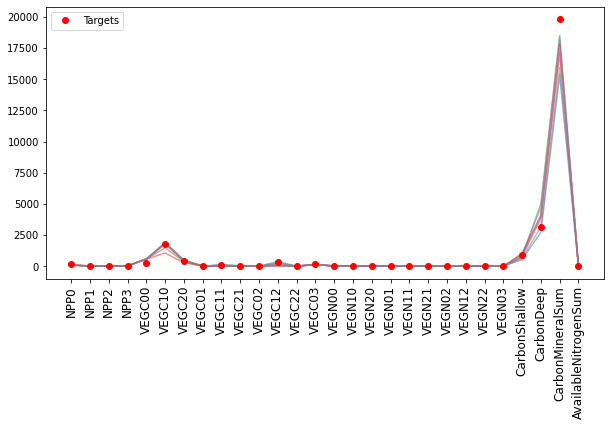

In [20]:
path='MD1/calib-step4-md1/' #10% variance
params='param_step4-md1.csv'
model='out_step4-md1.csv'
df_model = pd.read_csv(path+model,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC10','VEGC20','VEGC01','VEGC11','VEGC21','VEGC02',\
              'VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20','VEGN01','VEGN11','VEGN21','VEGN02',\
              'VEGN12','VEGN22','VEGN03', 'CarbonShallow', 'CarbonDeep', \
              'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

df_param = pd.read_csv(path+params,header=None)
output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
df_model.shape
ut.spaghetti_match_plot(df_param,df_model)

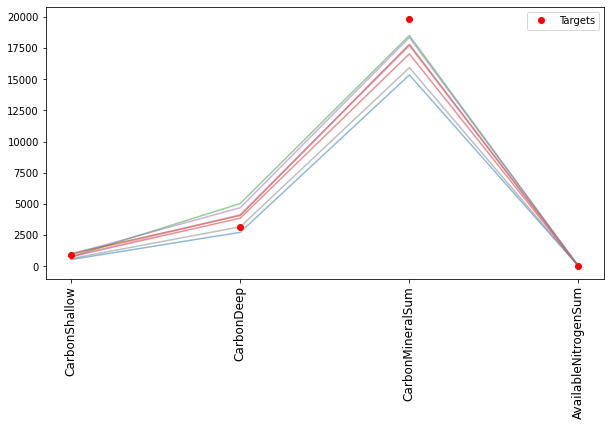

In [21]:
ut.spaghetti_match_plot(df_param,df_model.iloc[:,24:28])

In [22]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.9)
xparams[xparams.MAPE<1]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,$R^2$,RMSE,MAPE
0,0.260246,0.899366,0.100026,0.037541,6.660000e-06,0.910662,731950.819195,0.627169
2,0.137975,0.977740,0.599765,0.001580,5.700000e-07,0.984641,189061.215291,0.862344
6,0.167420,1.046672,0.154970,0.001767,1.866000e-05,0.981774,201711.531414,0.982543
7,0.320818,0.891747,0.161359,0.007205,5.000000e-07,0.938280,547844.899971,0.803495


In [23]:
ymodel[xparams.MAPE<1]

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum
0,114.332503,11.062243,19.520041,32.628758,574.177979,1898.013208,476.213724,8.400835,94.556384,31.878106,...,2.483166,0.716323,0.539222,9.767048,0.128095,1.154967,534.952968,2719.048444,15342.593537,7.648505
2,112.499596,10.468261,11.807583,32.930460,575.284650,1864.594714,468.110272,8.790728,82.970644,27.966311,...,2.179161,0.628185,0.488111,5.656188,0.074377,1.164833,757.082296,5029.558121,18507.169807,4.251182
6,113.672324,10.214824,10.156964,33.148953,575.220764,1879.282019,471.739331,8.583170,80.716319,27.232883,...,2.119834,0.612163,0.453741,4.761094,0.062991,1.172121,750.816478,4132.466365,17678.694642,2.718329
7,108.520873,9.993089,13.325888,32.156753,573.616077,1791.584436,450.658829,7.932616,83.018990,27.978329,...,2.180418,0.628771,0.482475,6.490385,0.085322,1.139093,613.992787,3159.217681,15926.691432,5.158878


In [24]:
df_model.tail()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum
4,110.953564,8.923807,7.031984,33.124210,574.641949,1833.407910,460.645123,8.245332,64.599901,21.876574,...,1.697757,0.492334,0.422327,3.153100,0.041345,1.171254,964.230926,4694.860658,18348.489099,6.575334
5,90.267547,2.622047,1.682179,31.960560,569.781366,1471.740088,372.410641,4.550016,0.002793,0.009113,...,0.000120,0.000279,0.239600,0.536230,0.006715,1.132263,1013.557128,4059.166376,17791.180819,2.255372
6,113.672324,10.214824,10.156964,33.148953,575.220764,1879.282019,471.739331,8.583170,80.716319,27.232883,...,2.119834,0.612163,0.453741,4.761094,0.062991,1.172121,750.816478,4132.466365,17678.694642,2.718329
7,108.520873,9.993089,13.325888,32.156753,573.616077,1791.584436,450.658829,7.932616,83.018990,27.978329,...,2.180418,0.628771,0.482475,6.490385,0.085322,1.139093,613.992787,3159.217681,15926.691432,5.158878
8,153.040000,12.270000,17.360000,27.100000,293.760000,1796.320000,404.480000,15.130000,100.160000,15.070000,...,2.480000,0.010000,0.700000,9.450000,0.030000,1.610000,888.910000,3174.530000,19821.500000,0.760000
